In [1]:

#- IMPORT THE LIBRARIES YOU WILL USE
#------------------------------------------
# You only need to import packages one time per notebook session. To keep your
# notebook clean and organized you can handle all imports at the top of your file.
# The following are included for example purposed, feel free to modify or delete 
# anything in this section.

import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
magics.context.use_bqstorage_api = True
import pyarrow
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import random
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200, edgeitems=100)

# Pipeline and column transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Data transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Data splitter and model evaluator
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, GridSearchCV

# Learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor
#from xgboost import XGBClassifier, XGBRegressor  # Need to install

# Performance metrics
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [2]:
import os
BIGQUERY_PROJECT = 'cloud-test-ironhacks'
BIGQUERY_KEYPATH = 'cloud-test-ironhacks-052e1ced8b54.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = BIGQUERY_KEYPATH
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [3]:
query = """
SELECT uu_id, week_number, total_claims
FROM cloud-test-ironhacks.dwd_data.suppression_remove
"""
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,uu_id,week_number,total_claims
0,9bee42b55f891413ae7fac2d9d89280a,1,30.0
1,9bee42b55f891413ae7fac2d9d89280a,2,51.0
2,9bee42b55f891413ae7fac2d9d89280a,3,39.0
3,9bee42b55f891413ae7fac2d9d89280a,4,36.0
4,9bee42b55f891413ae7fac2d9d89280a,5,49.0


Text(0, 0.5, 'total_claims')

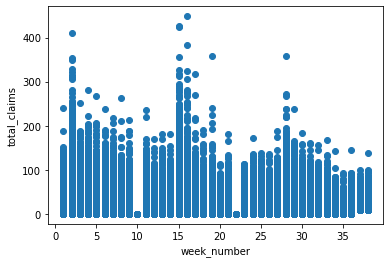

In [4]:
plt.scatter(data['week_number'], data['total_claims'])
plt.xlabel('week_number')
plt.ylabel('total_claims')

In [5]:
query = """
SELECT uu_id, race_white, race_black, race_asian, total_claims, week_number
FROM cloud-test-ironhacks.dwd_data.suppression_remove
"""
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,uu_id,race_white,race_black,race_asian,total_claims,week_number
0,9bee42b55f891413ae7fac2d9d89280a,24.0,NaN,0.0,30.0,1
1,9bee42b55f891413ae7fac2d9d89280a,42.0,NaN,NaN,51.0,2
2,9bee42b55f891413ae7fac2d9d89280a,27.0,NaN,NaN,39.0,3
3,9bee42b55f891413ae7fac2d9d89280a,28.0,NaN,0.0,36.0,4
4,9bee42b55f891413ae7fac2d9d89280a,43.0,NaN,0.0,49.0,5


In [6]:
data.fillna(0)

,uu_id,race_white,race_black,race_asian,total_claims,week_number
0,9bee42b55f891413ae7fac2d9d89280a,24.0,0.0,0.0,30.0,1
1,9bee42b55f891413ae7fac2d9d89280a,42.0,0.0,0.0,51.0,2
2,9bee42b55f891413ae7fac2d9d89280a,27.0,0.0,0.0,39.0,3
3,9bee42b55f891413ae7fac2d9d89280a,28.0,0.0,0.0,36.0,4
4,9bee42b55f891413ae7fac2d9d89280a,43.0,0.0,0.0,49.0,5
...,...,...,...,...,...,...
57367,20f6ad2e745b760f4d67491c4c9f2881,0.0,0.0,0.0,0.0,32
57368,20f6ad2e745b760f4d67491c4c9f2881,0.0,0.0,0.0,0.0,33
57369,20f6ad2e745b760f4d67491c4c9f2881,0.0,0.0,0.0,0.0,34
57370,20f6ad2e745b760f4d67491c4c9f2881,0.0,0.0,0.0,0.0,35


In [11]:
data['race_white'].mean()

25.927204435700233

In [12]:
data['race_black'].mean()

13.137750238322212

In [13]:
data['race_asian'].mean()

0.0685742059550728

Text(0, 0.5, 'total_claims')

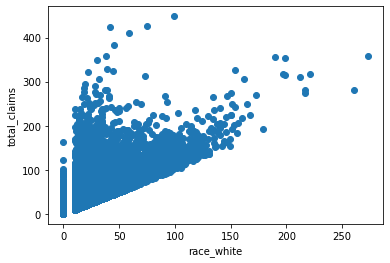

In [14]:
plt.scatter(data['race_white'], data['total_claims'])
plt.xlabel('race_white')
plt.ylabel('total_claims')

Text(0, 0.5, 'total_claims')

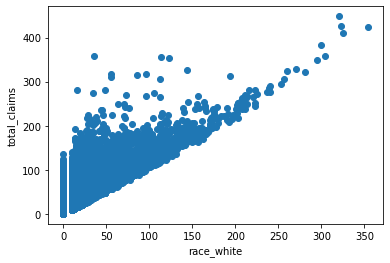

In [15]:
plt.scatter(data['race_black'], data['total_claims'])
plt.xlabel('race_white')
plt.ylabel('total_claims')

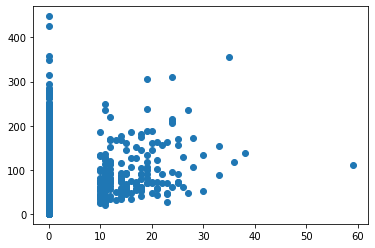

In [16]:
plt.scatter(data['race_asian'], data['total_claims'])
